In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# For better visualization of the plots
from jupyterthemes import jtplot
jtplot.style('onedork')

/Users/harshitsrivastava/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


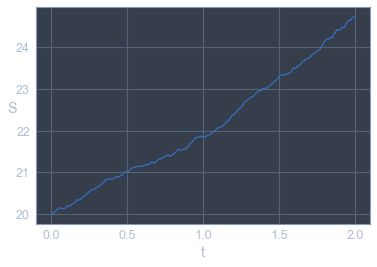

In [13]:
def geometric_brownian_motion(S0 = 20):
    T = 2
    mu = 0.1
    sigma = 0.01
    dt = 0.01
    N = round(T/dt)
    t = np.linspace(0, T, N)
    time = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    plt.plot(time, S)
    plt.xlabel("t", rotation='horizontal')
    plt.ylabel("S", rotation='horizontal')
    plt.show()
    
    return time, S

x_t, a_t = geometric_brownian_motion() # States and actions

For now, assuming: Asset (x_t) = Price (p_t)

In [23]:
alph_theta = 0
alph_omega = 0
batch_size = 10

# More parameters to be initialized


In [ ]:
### Calculating rewards:

R = []
for i in range(len(x_t)):
    if i == 0:
        x_init = x_t[i]
        pass
    else:
        r_t = (x_t[i] - x_init) / x_init if x_init else 0
        #print (x_init, x_t[i], r_t)
        x_init = x_t[i]
        #print ("new x_init: ", x_init)
        R.append(r_t)

## Policy $ \pi_\theta $

In order to calculte free energy (Eq B.1), we take one term at a time
$$ \pi_\theta(a_t|x_t) = \pi_0(a_t|x_t)e^{\beta (\bf {G}_t^\pi (x_t,a_t) - \bf {F}_t^\pi (x_t) )}
$$
t = T-1....0

where $ \pi_0: $
$$ \pi_0(a_t|x_t) = \frac {e^{ \frac {-1}{2} (a_t - \hat{a}(x_t))^T \Sigma_a^{-1} (a_t - \hat{a}(x_t) } } 
{\sqrt{(2\pi)^N |\Sigma_a|}}
$$
and $ {\bf G}_t^\pi(x_t, a_t) $:

$$ {\bf G}_t^\pi(x_t, a_t) = {\bf \hat{R}} (x_t, a_t) + \gamma \mathbb{E}_{t,a} \left[ {\bf F}_{t+1}^\pi(x_{t+1})|x_t, a_t \right]
$$

and $ {\bf F}_t^\pi(x_t) $:
$$ {\bf F}_t^\pi(x_t) = \frac{1}{\beta} log \sum_{a_t}\pi_0(a_t|x_t) e^{\beta {\bf G}_t^\pi(x_t, a_t)}
$$

## Conditional Probability $ p_\theta(y_{t+1}|y_t, a_t) $

$$ p_\theta(y_{t+1}|y_t, a_t) = p_z(z_{t+1}|z_t)p_\theta(x_t{x+1}|x_t, a_t) (Eq. 76)$$ 

where:
$$ p_z(z_{t+1}|z_t) = \frac {1} {\sqrt{(2\pi)^K |\Sigma_z|}} e^ {-\frac{1}{2}(z_{t+1} - ({\bf I}-\phi)\circ z_t)^T  
\Sigma_z^{-1} (z_{t+1} - ({\bf I} - \phi) \circ z_t)} (Eq. 77)
$$
and
$$ p_\theta(x_{t+1}|x_t, a_t) = \frac {1}{\sqrt{(2\pi)^N|\Sigma_r|}} e^{-\frac {1}{2}\Sigma_r^{-1}} (~Eq. 80)$$

## Variational Distribution $ q_\bar{a}(\bar{a}_t|y_t, \omega) $
$$ q_\bar{a}(\bar{a}_t|y_t, \omega) = \mathcal{N}(\bar{a}_t|\mu_a(y_t), \Sigma_a) (Eq. 65) $$

where:
$$ \mu_a(y_t) = \mu_a + \Lambda_a y_t $$

Vector $ \omega $ of parameters includes $ \mu_a, \Lambda_a $ and $ \Sigma_a $